In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Configuration
- compute nodes: 16 to 128 nodes
- task ratio: 12 : 10 : 10 : 10 : 1
- task TX: T_7200s (mdrun),	T_3900s (CVAE),	T_840s (TICA),	T_600s (Inference),	T_60s (RLDock)

ref: https://github.com/radical-experiments/deepdriveMD/issues/1#issuecomment-574750587

In [2]:
data = {"16":
               ["16", 
                1587795.900 / 2174934.298 * 100,
                1587578.024 / 2158283.472 * 100,
                1587492.020 / 2158289.040 * 100,
                100 * ((720 * 21 + 390 * 17.5 + 84 * 17.5 + 60 * 17.5 + 6 * 1) * 2**4 / (720 * 40 * 2**4))],
               "32": 
               ["32", 
                3181453.370 / 4359906.237 * 100,
                3183668.131 / (3183668.131 + 1160044.211) * 100,
                3185649.652 / (3185649.652 + 1138477.144) * 100,
                100 * ((720 * 21 + 390 * 17.5 + 84 * 17.5 + 60 * 17.5 + 6 * 1) * 2**5 / (720 * 40 * 2**5))],
               "64": 
               ["64", 
                7596872.311 / 9174387.647 * 100, 
                7479945.045 / (7479945.045 + 1565261.592) * 100,
                7615915.321 / (7615915.321 + 1588575.537) * 100,
                100 * ((720 * 21 + 390 * 17.5 + 84 * 17.5 + 60 * 17.5 + 6 * 1) * 2**6 / (720 * 40 * 2**6))],
               "128":
               ["128",
                5865233.991 / (5865233.991 + 4154447.863) * 100,
                25506531.112 / (25506531.112 + 7152782.350) * 100,
                26503741.426 / (26503741.426 + 8167733.763) * 100,
                100 * ((720 * 21 + 390 * 17.5 + 84 * 17.5 + 60 * 17.5 + 6 * 1) * 2**7 / (720 * 40 * 2**7))]
             }
df = pd.DataFrame.from_dict(data, orient='index', columns=['ratio','1st empirical (%)','2nd empirical (%)','3rd empirical (%)','theoretical (%)'])

In [3]:
df_actual = df.copy()

In [4]:
del df_actual['theoretical (%)']

In [5]:
df_actual

,ratio,1st empirical (%),2nd empirical (%),3rd empirical (%)
16,16,73.004316,73.557438,73.553263
32,32,72.970683,73.293715,73.671513
64,64,82.805225,82.695126,82.741299
128,128,58.537128,78.098798,76.442497


In [6]:
means=df_actual.mean(axis=1)
errors=df_actual.std(axis=1)

Text(0, 0.5, 'Resource Utilization (%)')

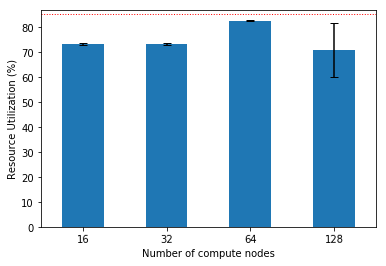

In [7]:
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=1)
theoretical = 100 * ((720 * 21 + 390 * 17.5 + 84 * 17.5 + 60 * 17.5 + 60 * 1) * 2**7 / (720 * 40 * 2**7))
plt.axhline(y=theoretical,linewidth=1, linestyle='dotted', color='red')
ax.set_xlabel("Number of compute nodes")
ax.set_ylabel("Resource Utilization (%)")

In [8]:
df['means'] = means
df['errors'] = errors
df

,ratio,1st empirical (%),2nd empirical (%),3rd empirical (%),theoretical (%),means,errors
16,16,73.004316,73.557438,73.553263,84.96875,73.371672,0.318147
32,32,72.970683,73.293715,73.671513,84.96875,73.311970,0.350772
64,64,82.805225,82.695126,82.741299,84.96875,82.747217,0.055287
128,128,58.537128,78.098798,76.442497,84.96875,71.026141,10.847461
